In [13]:
%matplotlib inline
import sklearn
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

In [5]:
dataset = datasets.load_digits()
X = dataset['data']
y = dataset['target']
print(dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [14]:
# пропустим через решаюшие деревья

AttributeError: head

In [27]:
clf = DecisionTreeClassifier()
scores = sklearn.model_selection.cross_val_score(clf, X, y, cv = 10)
scores.mean()

0.8280291744258225

In [44]:
clf1 = BaggingClassifier(n_estimators = 100)
scores1 = sklearn.model_selection.cross_val_score(clf1, X, y, cv = 10)
print(scores1)
scores1.mean()

[0.86666667 0.95555556 0.91666667 0.92777778 0.91666667 0.97777778
 0.97777778 0.91061453 0.88268156 0.90502793]


0.9237212911235257

In [70]:
d = X.shape[1]
number_of_features = int(d ** 0.5)
number_of_features

8

In [73]:
clf2 = BaggingClassifier(n_estimators = 100, max_features = number_of_features)
scores2 = sklearn.model_selection.cross_val_score(clf2, X, y, cv = 10)
print(scores2)
scores2.mean()

[0.91111111 0.97222222 0.92777778 0.89444444 0.93333333 0.91666667
 0.96666667 0.98324022 0.88826816 0.91061453]


0.9304345127250155

In [74]:
# бэггинг на рандомизированных деревьях
clf3 = BaggingClassifier(DecisionTreeClassifier(max_features = number_of_features), n_estimators = 100)
scores3 = sklearn.model_selection.cross_val_score(clf3, X, y, cv = 10)
print(scores3)
scores3.mean()

[0.9        0.97222222 0.94444444 0.93333333 0.96111111 0.97222222
 0.97777778 0.96089385 0.93854749 0.93854749]


0.9499099937926753

In [76]:
clf4 = RandomForestClassifier(n_estimators = 100, max_features = number_of_features)
scores4 = sklearn.model_selection.cross_val_score(clf4, X, y, cv = 10)
print(scores4)
scores4.mean()

[0.9        0.97777778 0.95       0.93333333 0.96111111 0.96666667
 0.97777778 0.97765363 0.93296089 0.93854749]


0.951582867783985

In [78]:
# зависимость от количества деревьев
number_of_estimators = np.arange(5, 150, 5)
scores_estimators = []
for n in number_of_estimators:
    print(n),
    clf5 = RandomForestClassifier(n_estimators = n, max_features = number_of_features)
    scores_estimators.append(sklearn.model_selection.cross_val_score(clf5, X, y, cv = 10).mean())

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145


Text(0.5, 1.0, 'RandomForest score')

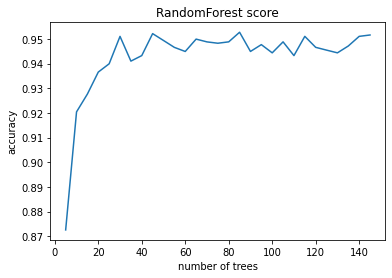

In [79]:
plt.plot(number_of_estimators, scores_estimators)
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.title('RandomForest score')

In [80]:
# зависимость от количества признаков
number_of_features_list = np.arange(5, d, 5)
scores_features = []
for n in number_of_features_list:
    print(n),
    clf6 = RandomForestClassifier(n_estimators = 100, max_features = n)
    scores_features.append(sklearn.model_selection.cross_val_score(clf6, X, y, cv = 10).mean())

5
10
15
20
25
30
35
40
45
50
55
60


Text(0.5, 1.0, 'RandomForest score')

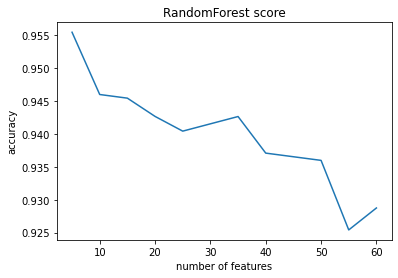

In [81]:
plt.plot(number_of_features_list, scores_features)
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title('RandomForest score')

In [82]:
# зависимость от глубины деревьев
depths = np.arange(1, 30, 1)
scores_depth = []
for n in depths:
    print(n),
    clf7 = RandomForestClassifier(n_estimators = 100, max_features = number_of_features, max_depth = n)
    scores_depth.append(sklearn.model_selection.cross_val_score(clf7, X, y, cv = 10).mean())

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


Text(0.5, 1.0, 'RandomForest score')

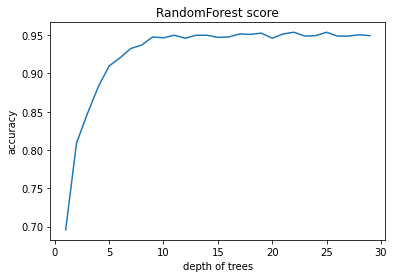

In [83]:
plt.plot(depths, scores_depth)
plt.xlabel('depth of trees')
plt.ylabel('accuracy')
plt.title('RandomForest score')